[xray](https://github.com/xray/xray) has been originally developed by scientists and engineers working at the [Climate Corporation](http://climate.com/)

It is an open source project and Python package that aims to bring the labeled data power of [pandas](http://pandas.pydata.org) to the physical sciences, by providing N-dimensional variants of the core
[pandas](http://pandas.pydata.org) data structures, `Series` and `DataFrame`: the xray `DataArray` and `Dataset`
In this post I will give a few reasons why I think that **xray** is destined to become a core Python package for people working with multi-dimensional labelled arrays, especially - but not only - in the geosciences, before illustrating the power of xray with a few examples of how it simplifies considerably common operations on climate datasets. <!-- TEASER_END -->
<br>

<br>
## Why is xray so great ?

Below is a list of reasons why I think that *i)* xray is great *ii)* it is destined to become an indispensable Python package 
for people who deal with multidimensional data:<br><br>

+ xray is open-source (of course !) and has a [non-restrictive license](https://github.com/xray/xray/blob/master/LICENSE)<br><br>
+ it is now part of [the anaconda Python distribution](https://store.continuum.io/cshop/anaconda/), which is currently probably the easiest way to install (and manage) the Python Scientific ecosystem on your machine, whatever your platform is. So to install xray all you have to do is to run: 

```
conda install xray
```
+ it plays well with the rest of the Scientific ecosystem, notably: 
    - the data in their `DataArray` data structure (more on that in the rest of the notebook) is actually stored as [numpy](http://www.numpy.org) arrays and it is easy to access them (they are just attributes of the `DataArray` objects)
    - you can import / export from / to [pandas](http://pandas.pydata.org) `DataFrames` or `Series`
<br><br>  
+ It is based on Pandas, arguably one of the most popular Python library in the so-called *'data sciences'*. Because xray tries and follow as much as possible the design choices and the API of Pandas, it means that if you are already a Pandas user, xray will feel extremely familiar.
<br><br>
+ It also plays well with the native Python data structures, one killer feature for me: you can define a [xray.Dataset](http://xray.readthedocs.org/en/latest/data-structures.html#dataset) (in a nutschell a container of labelled N-D arrays) from a Python dictionnary<br><br>
+ There is support for out-of-core computation through [dask](https://github.com/ContinuumIO/dask): see [this post from Stephan Hoyer](http://continuum.io/blog/xray-dask) on the continuum analytics blog.<br><br>
+ xray data structures can be saved into the efficient [NetCDF file format](http://www.unidata.ucar.edu/software/netcdf/), which is widely used in the earth sciences<br><br>
+ It has a [great documentation](http://xray.readthedocs.org/en/latest/)

For more on xray, I also suggest having a look at these talks from [Stephan Hoyer](http://stephanhoyer.com) (the core developper of xray): 

+ [Introducing xray: extended arrays for scientific datasets](https://www.youtube.com/watch?v=T5CZyNwBa9c) at Pydata Silicon Valley
+ [xray: N D Labeled Arrays and Datasets](https://www.youtube.com/watch?v=X0pAhJgySxk) at Scipy 2015.



<br>
## xray in action

the usual imports first 

In [6]:
%matplotlib inline

In [7]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap as bm

<br>importing xray, here the latest stable version, installed via `conda install xray`

In [8]:
import xray
print(xray.__version__)

0.5.2


In [9]:
def plot_field(X, lat, lon, vmin, vmax, step, cmap=plt.get_cmap('jet'), ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(10, (X.shape[0] / float(X.shape[1])) * 10))
    m.ax = ax
    im = m.contourf(lons, lats, X, np.arange(vmin, vmax+step, step), latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 30), labels=[0,0,0,1])
        m.drawparallels(np.arange(-80, 80, 20), labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)

<br>
### ingesting a necdf dataset

I am gonna use the [NOAA Interpolated Monthly Outgoing Longwave Radiation Dataset](ftp://ftp.cdc.noaa.gov/Datasets/interp_OLR/olr.mon.mean.nc)

In [10]:
dset = xray.open_dataset(os.path.join(os.environ['HOME'], 'data/olr.mon.mean.nc'))

<br>dset is a xray.Dataset, It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.


In [11]:
dset

<xray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 475)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * time     (time) datetime64[ns] 1974-06-01 1974-07-01 1974-08-01 ...
Data variables:
    olr      (time, lat, lon) float64 207.6 207.6 207.6 207.6 207.6 207.6 ...
Attributes:
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    platform: Observation
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    title: Monthly means of OLR from interpolated OLR dataset
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    Conventions: COARDS
    reference: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset.

<br>
### accessing data

In [105]:
lat = dset['lat']

In [106]:
type(lat)

xray.core.dataarray.DataArray

You can access the underlying **Numpy array** through the `data` attribute of the `lat` object

In [107]:
lat.data

array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,
        67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,
        45. ,  42.5,  40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,
        22.5,  20. ,  17.5,  15. ,  12.5,  10. ,   7.5,   5. ,   2.5,
         0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
       -22.5, -25. , -27.5, -30. , -32.5, -35. , -37.5, -40. , -42.5,
       -45. , -47.5, -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. ,
       -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5, -90. ], dtype=float32)

### selecting a Dataset along dimensions

In [108]:
dset.sel(time=('1998-1-1'))

<xray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
    time     datetime64[ns] 1998-01-01
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
Data variables:
    olr      (lat, lon) float64 160.0 160.0 160.0 160.0 160.0 160.0 160.0 ...
Attributes:
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    reference: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset. Bulletin of the American Meteorological Society, 77, 1275-1277

    platform: Observation
    Conventions: COARDS
    title: Monthly means of OLR from inte

In [109]:
dset.sel(time=slice('1998-1-1','2000-12-1'), lat=slice(40,-40))

<xray.Dataset>
Dimensions:  (lat: 33, lon: 144, time: 36)
Coordinates:
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
Data variables:
    olr      (time, lat, lon) float64 219.1 227.7 233.4 236.2 230.0 229.5 ...
Attributes:
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    reference: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset. Bulletin of the American Meteorological Society, 77, 1275-1277

    platform: Observation
    Conventions: COARD

I am going to extract the Tropical Pacific Ocean, because I am particularly interested into what's happening there

In [110]:
dset = dset.sel(lat=slice(40,-40), lon=slice(120,300))

In [111]:
dset

<xray.Dataset>
Dimensions:  (lat: 33, lon: 73, time: 475)
Coordinates:
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
  * time     (time) datetime64[ns] 1974-06-01 1974-07-01 1974-08-01 ...
  * lon      (lon) float32 120.0 122.5 125.0 127.5 130.0 132.5 135.0 137.5 ...
Data variables:
    olr      (time, lat, lon) float64 248.7 252.4 243.7 232.9 229.4 232.0 ...
Attributes:
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    reference: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset. Bulletin of the American Meteorological Society, 77, 1275-1277

    platform: Observation
    Conventions: COA

In [112]:
lat = dset['lat']
lon = dset['lon']

despite the variable `lat` and `lon` being of type `DataArray`, [numpy](http://www.numpy.org)'s function are usually 
able to deal directly with them, without having to pass them the underlying numpy array

In [113]:
lons, lats = np.meshgrid(lon, lat)

In [114]:
m = bm(projection='cyl',llcrnrlat=lat.data.min(),urcrnrlat=lat.data.max(),\
            llcrnrlon=lon.data.min(),urcrnrlon=lon.data.max(),\
            lat_ts=0,resolution='c')

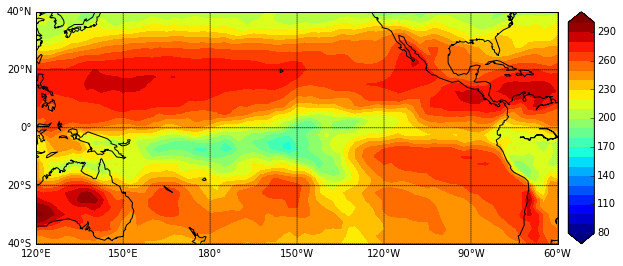

In [115]:
plot_field(dset.sel(time=('1998-1-1'))['olr'], lats, lons, 80, 300, 10, grid=True)

### calculates a monthly climatology using the groupby machinery

In [116]:
clim = dset.groupby('time.month').mean('time')

In [117]:
clim

<xray.Dataset>
Dimensions:  (lat: 33, lon: 73, month: 12)
Coordinates:
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
  * lon      (lon) float32 120.0 122.5 125.0 127.5 130.0 132.5 135.0 137.5 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    olr      (month, lat, lon) float64 214.7 210.9 206.2 209.3 211.1 207.9 ...

In [118]:
from calendar import month_name

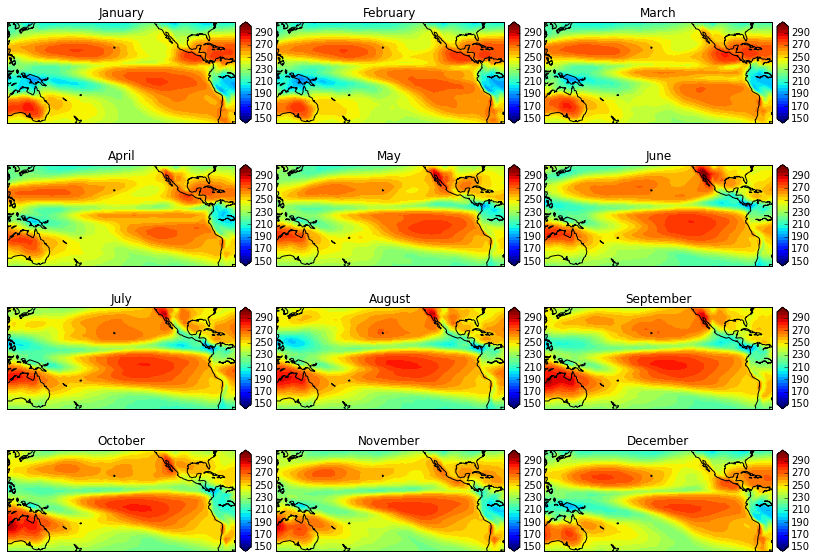

In [119]:
f, axes = plt.subplots(nrows=4,ncols=3, figsize=(14,10))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten()
for i, month in enumerate(range(1,13)): 
    ax = axes[i]
    plot_field(clim['olr'][i,:,:], lats, lons, 150, 300, 5, ax=ax, title=month_name[month])